#Logistic Regression vs. SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pdb

In [2]:
df = pd.read_csv('data/data_scientist.csv')

In [3]:
gh = df['gym_hours']
eh = df['email_hours']
ds = df['data_scientist']

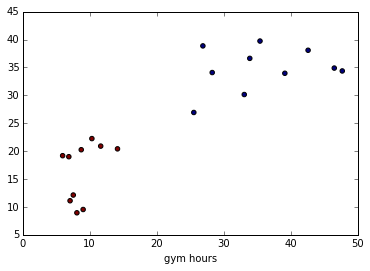

In [4]:
plt.scatter(gh, eh, c=ds)
plt.xlabel('gym hours')

In [5]:
eh_2 = eh[:,np.newaxis]
gh_2 = gh[:,np.newaxis]

In [6]:
X = np.hstack((gh_2, eh_2))
y = ds

##Margin of Logistic Regression Boundary 

In [7]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [8]:
lr.coef_[0][1]

0.28726173898385859

In [9]:
lr.intercept_[0]

1.3288207840492998

(0, 60)

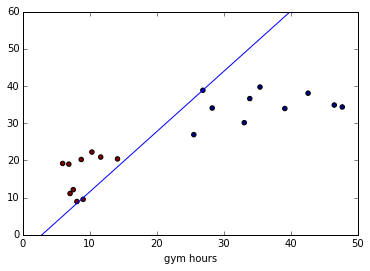

In [10]:
def graph(B_0, B_1, B_2, x_range):
    x = np.array(x_range)
    y = (B_0 + B_1*x)/float(-B_2)
#     pdb.set_trace()
    plt.plot(x, y)
    
graph(float(lr.intercept_[0]), float(lr.coef_[0][0]), float(lr.coef_[0][1]), range(0,50))
plt.scatter(gh, eh, c=ds, )
plt.xlabel('gym hours')
plt.xlim(0,50)
plt.ylim(0,60)

In [11]:
def distance(intercept, coefficients, x):
#     pdb.set_trace()
    return np.absolute(intercept[0] + np.inner(coefficients[0][:,np.newaxis].T, x))\
    /np.linalg.norm(coefficients[0])

distances = distance(lr.intercept_, lr.coef_, X)

(0, 60)

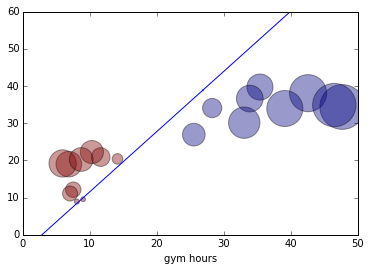

In [12]:
def graph(B_0, B_1, B_2, x_range):
    x = np.array(x_range)
    y = (B_0 + B_1*x)/float(-B_2)
#     pdb.set_trace()
    plt.plot(x, y)
    
graph(float(lr.intercept_[0]), float(lr.coef_[0][0]), float(lr.coef_[0][1]), range(0,50))
plt.scatter(gh, eh, c=ds, s=distances*100, alpha=0.4)
plt.xlabel('gym hours')
plt.xlim(0,50)
plt.ylim(0,60)

##Margin of SVM boundary

In [13]:
def plot_svc_decision(svc, show=True):
    # get the separating hyperplane
    w = svc.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(5, 35)
    yy = a * xx - (svc.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    if show:
        plt.show()

In [14]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

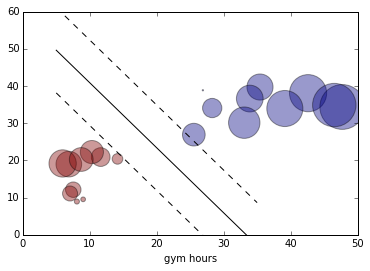

In [15]:
plt.scatter(gh, eh, c=ds, s=distances*100, alpha=0.4)
plt.xlabel('gym hours')
plt.xlim(0,50)
plt.ylim(0,60)
plot_svc_decision(clf)

In [78]:
distances = distance(clf.intercept_, clf.coef_, X)

In [79]:
np.sum(distances)

325.4775009051034

In [80]:
clf.predict(np.array([10,2.5]))

array([1])

In [81]:
lr.predict(np.array([10,2.5]))

array([0])

In [16]:
#wrongly classify in logistic regression. svm wins

#A cleaner version

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


class LogitSVMMargin(object):

    def __init__(self, fname, xnames, yname):
        self.df = pd.read_csv(fname)
        self.xnames = xnames
        self.yname = yname
        self.x = self.df[xnames]
        self.y = self.df[yname]


    def plot_data(self, size=None, show=False):
        color = self.y.map(lambda x: 'red' if x == 1 else 'blue')

        x1_name, x2_name = self.xnames
        x1 = self.x[x1_name]
        x2 = self.x[x2_name]

        if size is None:
            plt.scatter(x1, x2, color=color, edgecolor='black',
                        alpha=0.3)
        else:
            plt.scatter(x1, x2, color=color, s=size*100,
                        edgecolor='black', alpha=0.3)

        plt.xlabel(self.xnames[0], fontweight='bold', fontsize=14)
        plt.ylabel(self.xnames[1], fontweight='bold', fontsize=14)

        if show:
            plt.show()

    def fit_logit(self):
        logit = LogisticRegression(random_state=42)
        logit.fit(self.x, self.y)
        return logit

    def fit_svc(self):
        svc = SVC(kernel='linear')
        svc.fit(self.x, self.y)
        return svc

    @staticmethod
    def plot_logit_decision(logit, show=True):
        coefs = logit.coef_[0]
        intercept = logit.intercept_

        x1_coef = coefs[0]
        x2_coef = coefs[1]

        x1_range = np.linspace(5, 35)
        x2_range = -1. * (x1_coef * x1_range + intercept) / x2_coef

        plt.plot(x1_range, x2_range, color='g')

        if show:
            plt.show()

    @staticmethod
    def plot_svc_decision(svc, show=True):
        # get the separating hyperplane
        w = svc.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(5, 35)
        yy = a * xx - (svc.intercept_[0]) / w[1]

        # plot the parallels to the separating hyperplane that pass through the
        # support vectors
        b = svc.support_vectors_[0]
        yy_down = a * xx + (b[1] - a * b[0])
        b = svc.support_vectors_[-1]
        yy_up = a * xx + (b[1] - a * b[0])

        # plot the line, the points, and the nearest vectors to the plane
        plt.plot(xx, yy, 'k-')
        plt.plot(xx, yy_down, 'k--')
        plt.plot(xx, yy_up, 'k--')

        if show:
            plt.show()

    def calc_margin(self, est):
        coefs = est.coef_
        intercept = est.intercept_

        beta_norm = np.linalg.norm(coefs, ord=2)
        coefs_row = coefs
        margins = abs(coefs_row.dot(self.x.T) + intercept) / beta_norm
        return margins.ravel()

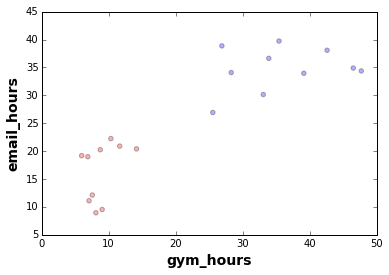

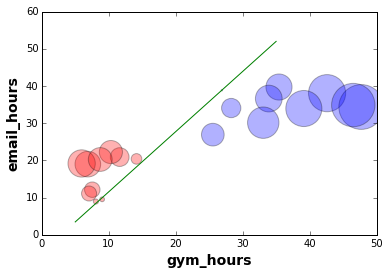

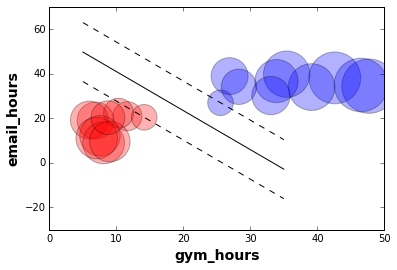

In [21]:
obj = LogitSVMMargin('data/data_scientist.csv', ['gym_hours', 'email_hours'], 'data_scientist')
obj.plot_data(size=None, show=True)

logit = obj.fit_logit()
logit_margin = obj.calc_margin(logit)
obj.plot_data(size=logit_margin, show=False)
obj.plot_logit_decision(logit, show=True)

svc = obj.fit_svc()
svc_margin = obj.calc_margin(svc)
obj.plot_data(size=svc_margin, show=False)
obj.plot_svc_decision(svc, show=True)

#Another example

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from scipy.spatial.distance import pdist

import numpy as np
import matplotlib.pyplot as plt


def simulate_data(n_points=300):
    np.random.seed(0)
    X = np.random.randn(n_points, 2)
    Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    return X,Y

def rmse(theta, thetahat):
    return np.sqrt(np.mean(theta - thetahat) ** 2)

def k_fold_logreg(features, target):
    '''
    Returns error for k-fold cross validation.
    '''
    index, num_folds = 0, 5
    m = len(features)
    kf = KFold(m, n_folds = num_folds)
    error = np.empty(num_folds)
    logreg = LogisticRegression()
    for train, test in kf:
        logreg.fit(features[train], target[train])
        pred = logreg.predict(features[test])
        error[index] = rmse(pred, target[test])
        index += 1

    return np.mean(error)

def plot_boundary(X, Y, logreg):
    '''
    Input numpy array, LogisticRegression
    '''
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()


def kernalize(XXTrans, d=2):
    '''
    Input numpy array
    Output numpy arra
    
    Input is the symmetric matrix X.XT and the output is the kernel matrix
    '''
    
    ker = lambda x : (1+x)**d
    vecfunc = np.vectorize(ker)
    return vecfunc(XXTrans) # this is kernel matrix


def plot_boundary_kernel(Xtest, Ytest, X, logregK):
    '''
    This funciton will be used to plot decision boundary for test data.
    This is similar to the previous plot function except that this uses kernalize function 
    before predicting the labels
    '''
    h = 0.02  # step size in the mesh
    x_min, x_max = Xtest[:, 0].min() - .5, Xtest[:, 0].max() + .5
    y_min, y_max = Xtest[:, 1].min() - .5, Xtest[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    xx_test = kernalize(np.c_[xx.ravel(), yy.ravel()].dot(X.T))

    Z = logregK.predict(xx_test)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(Xtest[:, 0], Xtest[:, 1], c=Ytest, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

def main():
    X, Y = simulate_data()
    fig1 = plt.figure(1)
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
    plt.show()

    print k_fold_logreg(X,Y)

    # plot boundary
    logreg = LogisticRegression()
    logreg.fit(X,Y)
    fig2 = plt.figure(2)
    plot_boundary(X, Y, logreg)

    # create kernel matrix
    XXTrans = X.dot(X.T)
    kernel = kernalize(XXTrans)

    # fit logistic to kernel matrix    
    logregK = LogisticRegression()
    logregK.fit(kernel,Y)

    #create test data
    Xtest, Ytest = simulate_data(n_points=100)
    fig3 = plt.figure(3)
    plot_boundary_kernel(Xtest, Ytest, X, logregK)

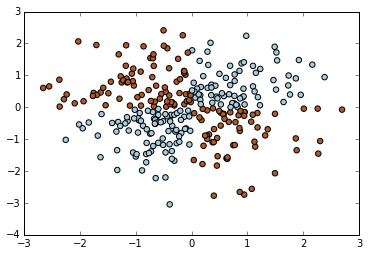

0.4


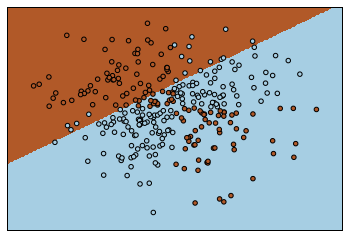

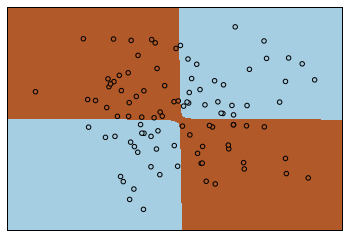

In [18]:
main()